From the [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/main-structure-and-greater-capital-city-statistical-areas/statistical-area-level-1):

Statistical Areas Level 1 (SA1s) are geographic areas built from whole Mesh Blocks. Whole SA1s aggregate to form Statistical Areas Level 2 (SA2s). SA1s are designed to maximise the geographic detail available for Census of Population and Housing data. However, limited Census of Population and Housing data may also be available at the Mesh Block level for ASGS Edition 3.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# time intense
melbourne_sua = gpd.read_file('data/prepared/geometry_melbourne_sua.shp')
melbourne_gcc = gpd.read_file('data/prepared/geometry_melbourne_gcc.shp')

melb_data = pd.read_hdf('data/melb_data.h5')

from util.melbourne import Melbourne

melbourne = Melbourne(melb_data, frac=1)

In [2]:
melbourne.raw_df[melbourne.numerical_features].head(50)

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount
12308,3,12.9,3,1,2.0,300.0,NaN,NaN,-37.68416,144.88950,3285
6647,2,7.0,2,1,1.0,261.0,100.0,1880.0,-37.81570,144.88700,6543
1402,2,5.9,2,1,1.0,0.0,85.0,1970.0,-37.76070,144.93930,7082
861,3,13.9,3,1,2.0,588.0,133.0,1960.0,-37.92860,145.06900,10969
10083,4,14.7,4,2,1.0,722.0,NaN,1980.0,-37.85848,145.23982,5424
7496,3,9.5,3,1,2.0,730.0,NaN,NaN,-37.75400,145.04530,790
5077,3,11.2,3,1,1.0,370.0,NaN,NaN,-37.71900,144.99710,21650
7249,3,8.2,3,2,3.0,336.0,94.0,1910.0,-37.79950,144.87940,5058
11861,4,14.7,4,2,1.0,531.0,147.0,2003.0,-37.89556,144.64268,16166
11306,3,14.7,3,1,1.0,620.0,NaN,NaN,-37.85436,145.13827,4048


In [3]:
melbourne.raw_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Month
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378,7.052283
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772,2.536034
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,1.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000,5.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000,7.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000,9.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,12.000000


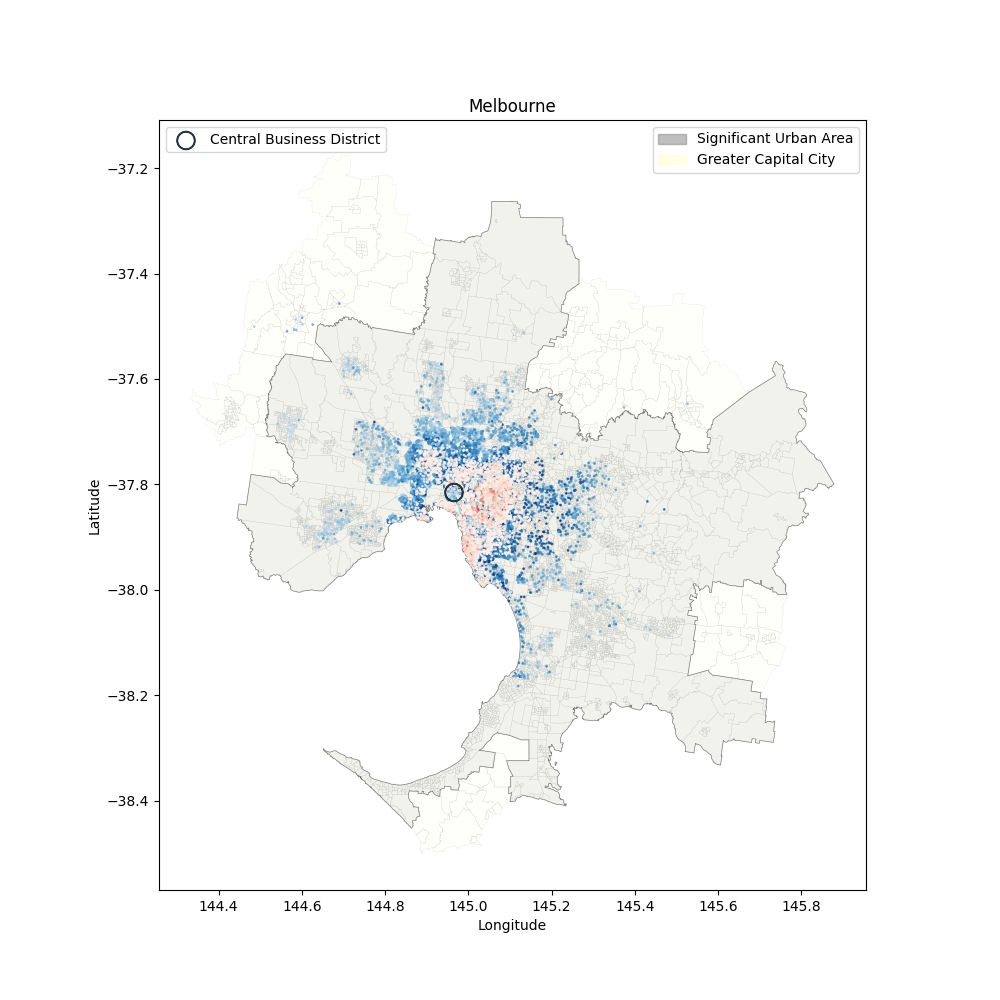

In [4]:
%matplotlib widget

import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 10))

ax.set(
    title='Melbourne',
    xlabel='Longitude',
    ylabel='Latitude'
)
melbourne_sua.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=.5, alpha=.5)
melbourne_sua.plot(ax=ax, facecolor='grey', edgecolor='none', alpha=.1)

melbourne_gcc.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.1, alpha=.5)
melbourne_gcc.plot(ax=ax, facecolor='yellow', edgecolor='none', alpha=.025)

melbourne_proxy_handles = [
    mpatches.Patch(color='grey', alpha=.5, label='Significant Urban Area'),
    mpatches.Patch(color='yellow', alpha=.1, label='Greater Capital City'),
]
legend_shape = ax.legend(handles=melbourne_proxy_handles, loc='upper right')
ax.add_artist(legend_shape)

# Discriminate between cheap and expensive houses
melbourne_cheap, melbourne_expensive = melbourne.split_q(q=.75)

ax.scatter(
    melbourne_cheap.raw_df['Longitude'], melbourne_cheap.raw_df['Latitude'],
    s=1, 
    c=melbourne_cheap.prices_01, 
    cmap=plt.get_cmap('Blues'),
    alpha=.75
)
ax.scatter(
    melbourne_expensive.raw_df['Longitude'], melbourne_expensive.raw_df['Latitude'],
    s=.75, 
    c=melbourne_expensive.prices_01, 
    cmap=plt.get_cmap('Reds'),
    alpha=.75
)
# Melbourne Central Business District (CBD)
ax.scatter(
    [melbourne.cbd_long], [melbourne.cbd_lat],
    s=200,
    marker='$\u25EF$',
    edgecolors='black',
    lw=.5,
    label='Central Business District'
)
ax.legend(loc='upper left')


plt.show()
# fig.canvas.draw()

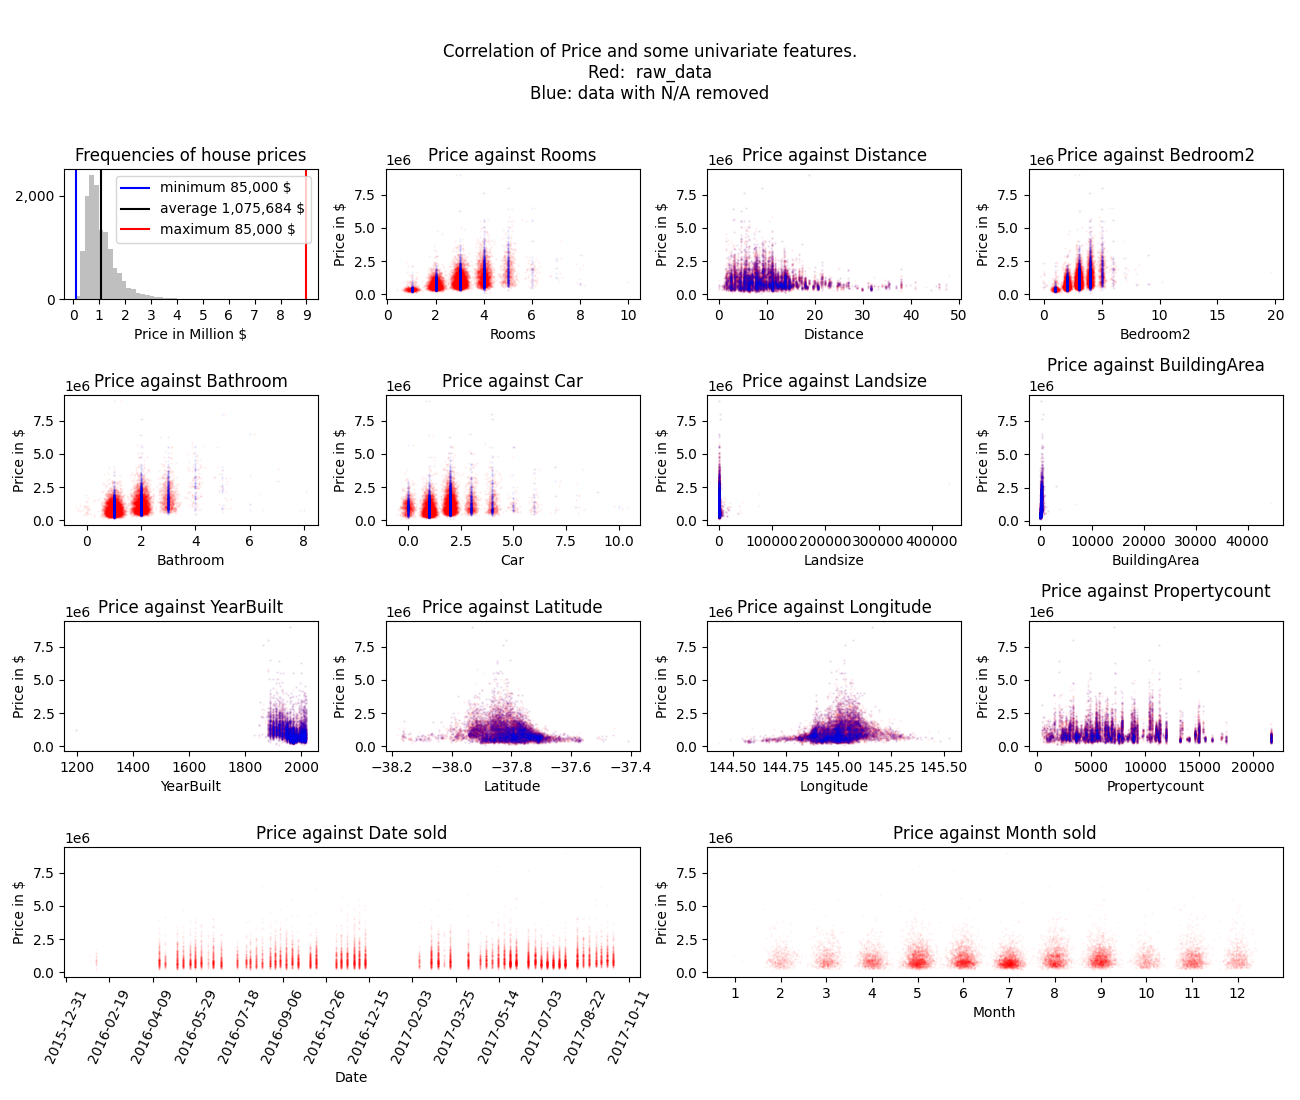

In [5]:
from matplotlib.ticker import MultipleLocator, AutoLocator, FuncFormatter, FixedLocator

jitter = lambda scale=.15, size=len(melbourne.raw_df): np.random.normal(loc=0, scale=scale, size=size)

fig, axes = plt.subplots(4, 4, figsize=(13, 11))
gs = fig.add_gridspec(4, 4)

fig.suptitle('''
Correlation of Price and some univariate features.
Red:  raw_data
Blue: data with N/A removed
''')

ax = axes[0,0]
ax.set_title('Frequencies of house prices')
ax.set_xlabel('Price in Million \\$')
ax.xaxis.set_major_locator(MultipleLocator(base=1e6))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:,.0f}'))
ax.yaxis.set_major_locator(MultipleLocator(base=2e3))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

ax.hist(melbourne.prices, bins=50, range=(melbourne.min_price, melbourne.max_price), color='grey', alpha=.5)
ax.axvline(melbourne.min_price, color='blue', label=f'minimum {melbourne.min_price:,.0f} \\$')
ax.axvline(melbourne.mean_price, color='black', label=f'average {melbourne.mean_price:,.0f} \\$')
ax.axvline(melbourne.max_price, color='red', label=f'maximum {melbourne.min_price:,.0f} \\$')

ax.legend()


# Plot Price against predictor for each of the 11 numerical predictors

for ax, predictor in zip(axes.flatten()[1:], melbourne.numerical_features):
    ax.set(
        title=f'Price against {predictor}',
        xlabel=f'{predictor}',
        ylabel=f'Price in \\$'
    )
    if melbourne.raw_df.dtypes[predictor] == int or predictor in ['Car', 'YearBuilt']:
        ax.scatter(melbourne.raw_df[predictor] + jitter(), melbourne.raw_df['Price'], s=.5, alpha=.05, color='red')
    else:
        ax.scatter(melbourne.raw_df[predictor], melbourne.raw_df['Price'], s=.5, alpha=.05, color='red')
    ax.scatter(melbourne.df[predictor], melbourne.df['Price'], s=.5, alpha=.05, color='blue')


# Plot Price against time features

# Date

ax = fig.add_subplot(gs[3, :2])
axes.flatten()[ len(melbourne.numerical_features) + 1 ]
dates = melbourne.raw_df.loc[:, ['Date', 'Price']].sort_values('Date')
ax.set(
    title=f'Price against Date sold',
    xlabel=f'Date',
    ylabel=f'Price in \\$',
)
ax.scatter(dates['Date'], dates['Price'], s=.25, alpha=.05, color='red')

ax.xaxis.set_major_locator(MultipleLocator(base=50))
ax.tick_params(axis='x', rotation=65)

# Month

ax = ax = fig.add_subplot(gs[3, 2:])
ax.set(
    title=f'Price against Month sold',
    xlabel=f'Month',
    ylabel=f'Price in \\$',
)
ax.scatter(melbourne.raw_df['Month'] + jitter(), melbourne.raw_df['Price'], s=.25, alpha=.05, color='red')

ax.xaxis.set_major_locator(FixedLocator(range(1, 13)))

for ax in axes.flatten()[ len(melbourne.numerical_features) + 1: ]:
    ax.set_visible(False)

fig.tight_layout()
plt.show()

It seems there are outliers or features that clearly sort out samples exceeding or falling below a certain threshold.

In the latter case, we may configure a DecisionTreeRegressor first splitting at these feature thresholds, 
before moving on to automatic max-information-gain splitting.

In [6]:
# Outlier: There is one house with 20 bedrooms.
melbourne.raw_df.loc[melbourne.raw_df.Bedroom2 > 10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Month
7404,Caulfield East,5 Grange Rd,3,h,1650000.0,PI,Woodards,2016-08-06,9.3,3145.0,...,2.0,875.0,NaN,NaN,Glen Eira,-37.8815,145.0491,Southern Metropolitan,608,8


In [7]:
# Train DecisionTreeRegressor model splitting the feature Landsize at 2500
melbourne.raw_df.loc[melbourne.raw_df.Landsize > 2500].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Month
count,166.000000,1.660000e+02,166.000000,166.000000,166.000000,166.000000,163.000000,166.000000,79.000000,102.000000,166.000000,166.000000,166.000000,166.000000
mean,2.379518,8.049714e+05,7.763253,3109.795181,2.373494,1.566265,1.453988,10417.277108,703.772658,1993.725490,-37.807905,144.981826,8092.301205,6.307229
std,1.000274,4.678482e+05,8.999281,109.819274,1.005570,0.645596,0.876317,34675.165364,5007.824948,31.545396,0.076260,0.114094,4490.022561,2.578855
min,1.000000,2.800000e+05,0.700000,3000.000000,1.000000,1.000000,0.000000,2522.000000,4.000000,1830.000000,-38.182550,144.485710,249.000000,2.000000
25%,2.000000,5.027500e+05,2.725000,3033.000000,2.000000,1.000000,1.000000,3201.500000,70.000000,1995.000000,-37.836130,144.938367,4918.000000,4.000000
50%,2.000000,6.550000e+05,4.500000,3101.500000,2.000000,1.000000,1.000000,4314.000000,81.000000,2005.000000,-37.808980,144.983615,6786.000000,6.000000
75%,3.000000,9.442500e+05,8.700000,3141.000000,3.000000,2.000000,2.000000,7167.250000,116.000000,2011.000000,-37.784600,145.010400,11308.000000,8.000000
max,7.000000,2.705000e+06,48.100000,3795.000000,7.000000,4.000000,5.000000,433014.000000,44515.000000,2015.000000,-37.453920,145.470520,21650.000000,12.000000


In [8]:
# Train DecisionTreeRegressor model splitting the feature BuildingArea at 500
melbourne.raw_df.loc[melbourne.raw_df.BuildingArea > 500].describe()
# melbourne.df.sort_values('BuildingArea')

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Month
count,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,43.000000,63.000000,63.000000,63.000000,63.000000
mean,3.825397,1.554294e+06,12.996825,3127.666667,3.730159,2.206349,2.190476,1377.301587,1531.597090,1968.116279,-37.827244,145.028788,8132.793651,7.047619
std,1.198651,9.967659e+05,8.245859,112.152834,1.152925,1.333909,1.075492,5535.463141,5578.485582,32.156766,0.104698,0.127571,4790.034915,2.260663
min,2.000000,4.350000e+05,3.500000,3012.000000,2.000000,1.000000,0.000000,0.000000,501.000000,1890.000000,-38.104600,144.588640,849.000000,2.000000
25%,3.000000,8.750000e+05,9.050000,3072.000000,3.000000,1.000000,2.000000,532.000000,530.500000,1950.000000,-37.892750,144.986350,4794.000000,6.000000
50%,4.000000,1.241000e+06,11.100000,3105.000000,4.000000,2.000000,2.000000,625.000000,613.000000,1965.000000,-37.824800,145.035400,7485.000000,7.000000
75%,4.500000,1.911500e+06,13.850000,3164.000000,4.000000,3.000000,2.000000,731.000000,719.500000,1999.500000,-37.761900,145.087800,10412.000000,9.000000
max,8.000000,5.525000e+06,48.100000,3810.000000,9.000000,7.000000,6.000000,44500.000000,44515.000000,2013.000000,-37.453920,145.482730,21650.000000,12.000000


In [9]:
# one building was built before 1800. This is clearly an outlier. Maybe its also a wrong input ...?
# Do not train DecisionTreeRegressor model by splitting on feature YearBuilt at 1800.
# This would clearly lead to wrong price predictions for all buildings built before 1800 because the
# training set consists of just the following single example:
melbourne.raw_df.loc[melbourne.raw_df.YearBuilt < 1800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Month
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,...,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366,6


In [10]:
melbourne.raw_df.loc[melbourne.raw_df.Propertycount > 20000].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Month
count,359.000000,3.590000e+02,359.000000,359.0,359.000000,359.000000,359.000000,359.000000,174.000000,203.000000,359.000000,359.000000,359.0,359.000000
mean,2.810585,6.900089e+05,11.420613,3073.0,2.777159,1.284123,1.849582,584.278552,124.555345,1975.073892,-37.713984,145.009586,21650.0,7.272981
std,0.820682,2.313681e+05,0.358019,0.0,0.815651,0.515187,1.123489,2189.728660,79.619236,26.539145,0.010203,0.013639,0.0,2.632653
min,1.000000,2.160000e+05,11.200000,3073.0,0.000000,1.000000,0.000000,0.000000,1.000000,1920.000000,-37.732800,144.975500,21650.0,2.000000
25%,2.000000,5.022500e+05,11.200000,3073.0,2.000000,1.000000,1.000000,183.500000,84.250000,1960.000000,-37.722750,144.998960,21650.0,5.000000
50%,3.000000,6.850000e+05,11.200000,3073.0,3.000000,1.000000,2.000000,513.000000,108.500000,1970.000000,-37.713310,145.010390,21650.0,7.000000
75%,3.000000,8.425000e+05,12.000000,3073.0,3.000000,2.000000,2.000000,656.500000,135.750000,2006.000000,-37.706430,145.021000,21650.0,9.000000
max,5.000000,1.700000e+06,12.000000,3073.0,5.000000,3.000000,10.000000,41400.000000,558.000000,2017.000000,-37.691700,145.036100,21650.0,12.000000


In [11]:
# Some super expensive houses. Should they be treated as outliers?
melbourne.raw_df.loc[melbourne.raw_df.Price > 5e6]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Month
8725,Armadale,52 Adelaide St,5,h,5200000.0,SP,Marshall,2017-07-01,6.3,3143.0,...,3.0,761.0,NaN,NaN,Stonnington,-37.85311,145.02847,Southern Metropolitan,4836,7
251,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,2016-09-17,6.3,3143.0,...,4.0,1491.0,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836,9
3114,Hawthorn,49 Berkeley St,3,h,5100000.0,S,Jellis,2016-12-03,4.6,3122.0,...,3.0,1038.0,NaN,NaN,Boroondara,-37.83320,145.03660,Southern Metropolitan,11308,12
12557,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,2017-09-09,3.0,3206.0,...,1.0,553.0,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019,9
12762,Kew,130 Sackville St,5,h,5065000.0,PI,RT,2017-09-16,5.4,3101.0,...,2.0,892.0,NaN,1917.0,NaN,-37.81420,145.05973,Southern Metropolitan,10331,9
12219,Armadale,121 Kooyong Rd,4,h,5100000.0,S,Marshall,2017-09-03,6.3,3143.0,...,2.0,761.0,255.0,1900.0,NaN,-37.85249,145.02091,Southern Metropolitan,4836,9
9575,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,2017-06-17,5.3,3122.0,...,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308,6
3616,Kew,15 Barry St,6,h,6500000.0,S,Jellis,2016-08-13,5.6,3101.0,...,3.0,1334.0,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331,8
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,...,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113,7
7692,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,2017-05-13,9.0,3126.0,...,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265,5


In [12]:
outliers_above = {
    'Bedroom2': 10,
    'Landsize': 2500,
    'BuildingArea': 500,
    'Propertycount': 20000
}
outliers_below = {
    'YearBuilt': 1800,
}

from functools import reduce
from numpy import logical_and

mask_list_raw = [
    melbourne.raw_df[feature] <= threshold for feature, threshold in outliers_above.items()
] + [
    melbourne.raw_df[feature] >= threshold for feature, threshold in outliers_below.items()
]
mask_raw = reduce(logical_and, mask_list_raw)
melbourne_outliers_removed_raw = melbourne.raw_df[mask_raw]
melbourne_outliers_removed_raw.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Month
count,6571.000000,6.571000e+03,6571.000000,6571.000000,6571.000000,6571.000000,6544.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000
mean,2.984477,1.090446e+06,10.123832,3105.075635,2.957845,1.596865,1.601925,420.577842,140.771519,1963.690458,-37.810317,144.991334,7055.630041,7.152032
std,0.963916,6.733146e+05,6.041098,92.092191,0.966196,0.709481,0.937772,331.996513,70.486621,36.813563,0.079637,0.106133,3749.367064,2.564751
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1850.000000,-38.164920,144.542370,389.000000,2.000000
25%,2.000000,6.400000e+05,6.100000,3043.000000,2.000000,1.000000,1.000000,163.500000,94.000000,1940.000000,-37.857965,144.923700,4217.000000,5.000000
50%,3.000000,9.020000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,396.000000,126.700000,1970.000000,-37.804680,144.995600,6543.000000,7.000000
75%,4.000000,1.350000e+06,13.000000,3150.000000,4.000000,2.000000,2.000000,632.000000,173.000000,1999.000000,-37.759975,145.057900,9264.000000,9.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,2488.000000,495.000000,2018.000000,-37.408530,145.526350,17496.000000,12.000000


In [13]:
mask_list = [
    melbourne.df[feature] <= threshold for feature, threshold in outliers_above.items()
] + [
    melbourne.df[feature] >= threshold for feature, threshold in outliers_below.items()
]
mask = reduce(logical_and, mask_list)
melbourne_outliers_removed = melbourne.df[mask]

melbourne_outliers_removed.describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Price
count,6544.000000,6544.000000,6544.000000,6544.000000,6544.000000,6544.000000,6544.000000,6544.000000,6544.000000,6544.000000,6544.000000,6.544000e+03
mean,2.986400,10.149679,2.959658,1.598105,1.601925,421.361247,140.886408,1963.918857,-37.810278,144.991411,7053.997402,1.089197e+06
std,0.964587,6.039318,0.966926,0.710074,0.937772,332.246023,70.590105,36.658421,0.079771,0.106317,3748.862276,6.735183e+05
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1850.000000,-38.164920,144.542370,389.000000,1.310000e+05
25%,2.000000,6.100000,2.000000,1.000000,1.000000,164.000000,94.000000,1940.000000,-37.858025,144.923533,4217.000000,6.400000e+05
50%,3.000000,9.200000,3.000000,1.000000,2.000000,397.500000,127.000000,1970.000000,-37.804600,144.995800,6543.000000,9.000000e+05
75%,4.000000,13.000000,4.000000,2.000000,2.000000,632.250000,173.000000,1999.000000,-37.759700,145.058225,9264.000000,1.350000e+06
max,8.000000,47.400000,9.000000,8.000000,10.000000,2488.000000,495.000000,2018.000000,-37.408530,145.526350,17496.000000,9.000000e+06


We make the same plots as before, but this time without the outliers

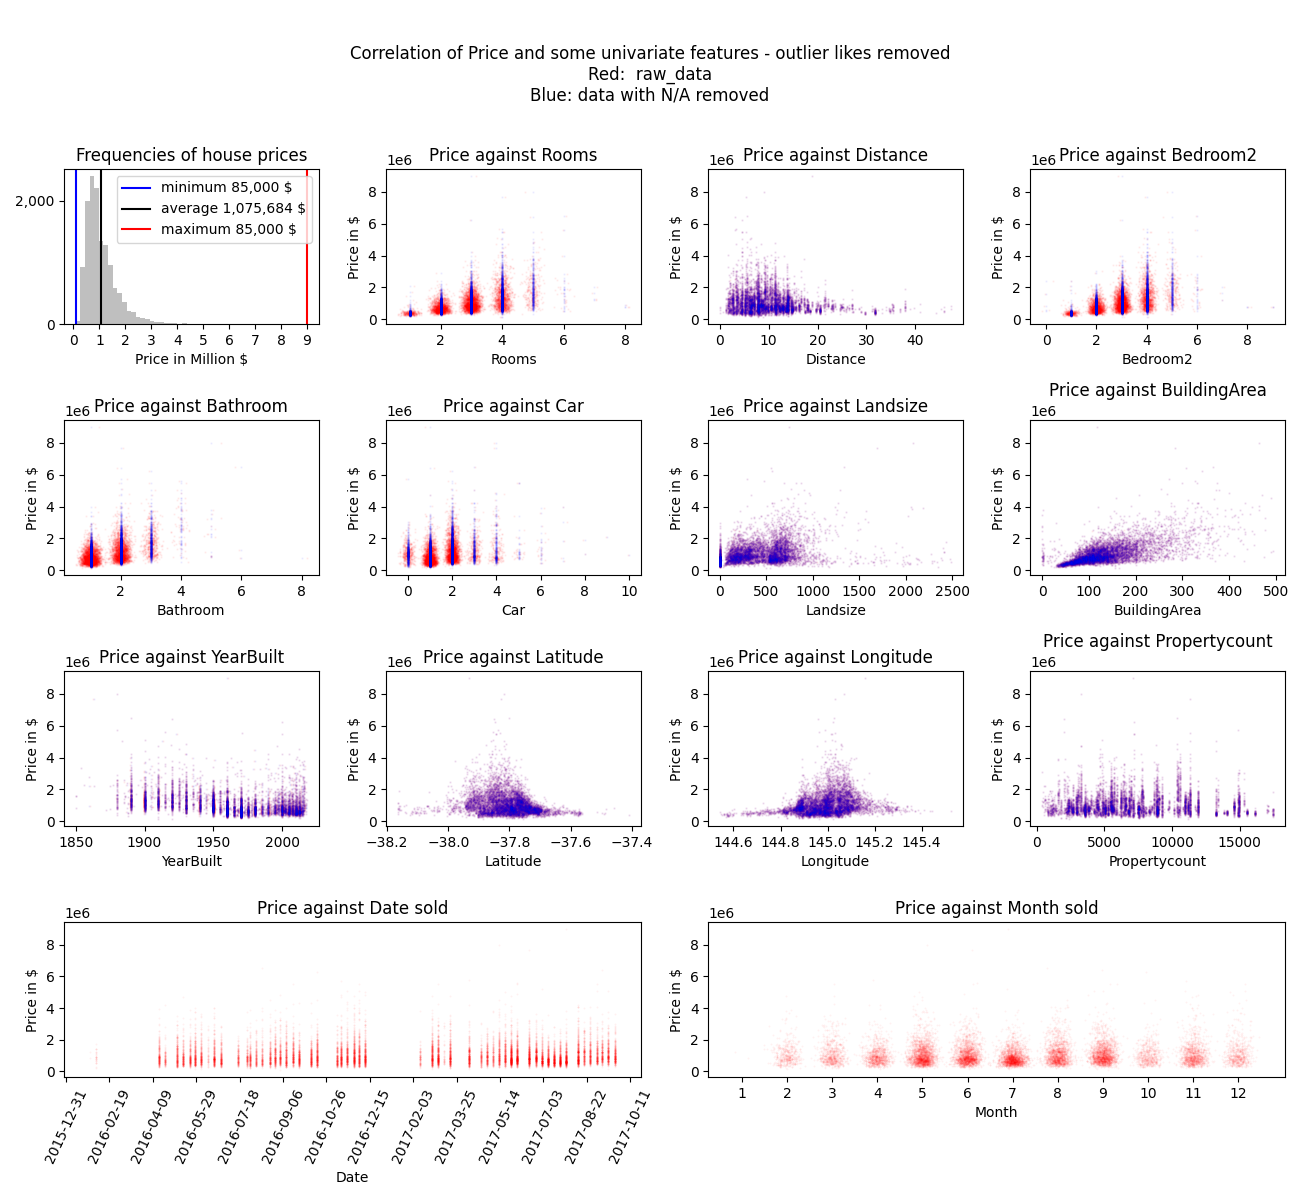

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(13, 12))

fig.suptitle('''
Correlation of Price and some univariate features - outlier likes removed
Red:  raw_data
Blue: data with N/A removed
''')

ax = axes[0,0]
ax.set_title('Frequencies of house prices')
ax.set_xlabel('Price in Million \\$')
ax.xaxis.set_major_locator(MultipleLocator(base=1e6))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:,.0f}'))
ax.yaxis.set_major_locator(MultipleLocator(base=2e3))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

ax.hist(melbourne.prices, bins=50, range=(melbourne.min_price, melbourne.max_price), color='grey', alpha=.5)
ax.axvline(melbourne.min_price, color='blue', label=f'minimum {melbourne.min_price:,.0f} \\$')
ax.axvline(melbourne.mean_price, color='black', label=f'average {melbourne.mean_price:,.0f} \\$')
ax.axvline(melbourne.max_price, color='red', label=f'maximum {melbourne.min_price:,.0f} \\$')

ax.legend()

# Plot Price against predictor for each of the 11 numerical predictors

for ax, predictor in zip(axes.flatten()[1:], melbourne.numerical_features):
    ax.set(
        title=f'Price against {predictor}',
        xlabel=f'{predictor}',
        ylabel=f'Price in \\$'
    )
    if melbourne.raw_df.dtypes[predictor] == int or predictor in ['Car', 'YearBuilt']:
        ax.scatter(melbourne_outliers_removed_raw[predictor] + jitter(size=len(melbourne_outliers_removed_raw)), melbourne_outliers_removed_raw['Price'], s=.5, alpha=.05, color='red')
    else:
        ax.scatter(melbourne_outliers_removed_raw[predictor], melbourne_outliers_removed_raw['Price'], s=.5, alpha=.05, color='red')
    ax.scatter(melbourne_outliers_removed[predictor], melbourne_outliers_removed['Price'], s=.5, alpha=.05, color='blue')


# Plot Price against time features

# Date

ax = fig.add_subplot(gs[3, :2])
axes.flatten()[ len(melbourne.numerical_features) + 1 ]
dates = melbourne.raw_df.loc[:, ['Date', 'Price']].sort_values('Date')
ax.set(
    title=f'Price against Date sold',
    xlabel=f'Date',
    ylabel=f'Price in \\$',
)
ax.scatter(dates['Date'], dates['Price'], s=.25, alpha=.05, color='red')

ax.xaxis.set_major_locator(MultipleLocator(base=50))
ax.tick_params(axis='x', rotation=65)

# Month

ax = ax = fig.add_subplot(gs[3, 2:])
ax.set(
    title=f'Price against Month sold',
    xlabel=f'Month',
    ylabel=f'Price in \\$',
)
ax.scatter(melbourne.raw_df['Month'] + jitter(), melbourne.raw_df['Price'], s=.25, alpha=.05, color='red')

ax.xaxis.set_major_locator(FixedLocator(range(1, 13)))

for ax in axes.flatten()[ len(melbourne.numerical_features) + 1: ]:
    ax.set_visible(False)


fig.tight_layout()
plt.show()

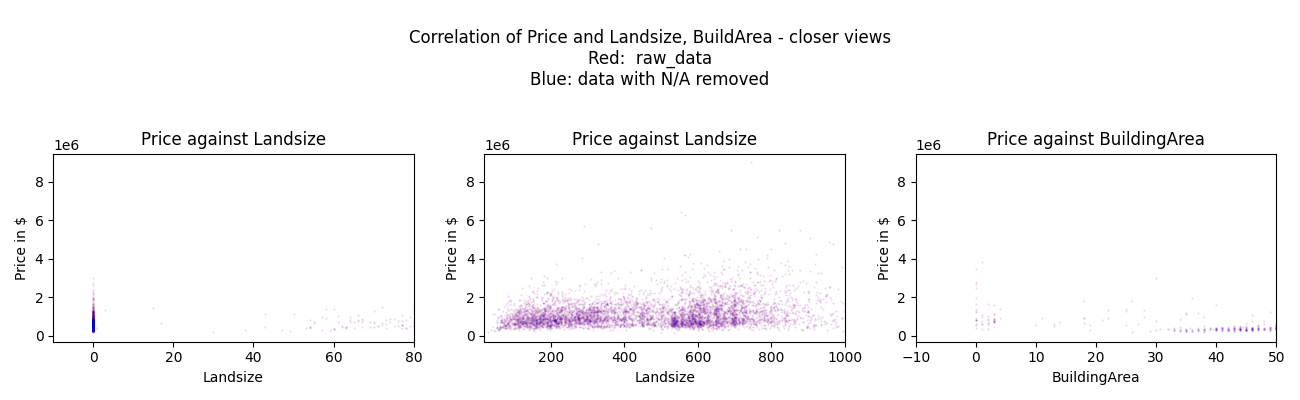

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

fig.suptitle('''
Correlation of Price and Landsize, BuildArea - closer views
Red:  raw_data
Blue: data with N/A removed
''')

xranges = [
    (-10, 80),
    (20, 1000),
    (-10, 50)
]

for ax, predictor, xrange in zip(axes, ['Landsize', 'Landsize', 'BuildingArea'], xranges):
    ax.set(
        title=f'Price against {predictor}',
        xlabel=f'{predictor}',
        ylabel=f'Price in \\$',
        xlim=xrange
    )
    ax.scatter(melbourne_outliers_removed_raw[predictor], melbourne_outliers_removed_raw['Price'], s=.5, alpha=.05, color='red')
    ax.scatter(melbourne_outliers_removed[predictor], melbourne_outliers_removed['Price'], s=.5, alpha=.05, color='blue')

fig.tight_layout()
plt.show()

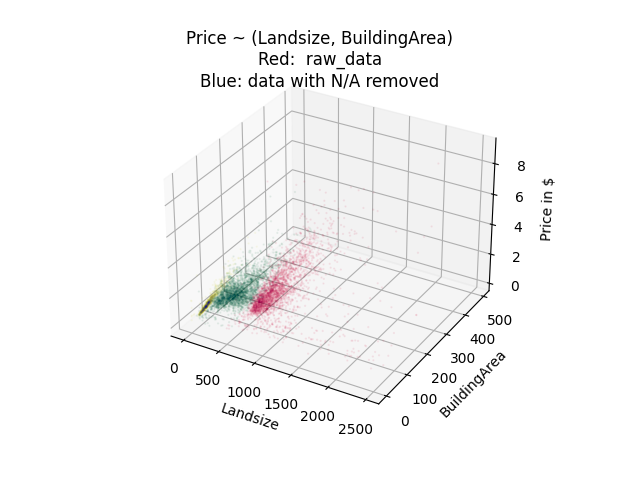

In [16]:
%matplotlib widget
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

fig.suptitle('''
Price ~ (Landsize, BuildingArea)
Red:  raw_data
Blue: data with N/A removed
''')

melbourne_outliers_removed_raw_0 = melbourne_outliers_removed_raw[ melbourne_outliers_removed_raw.Landsize == 0 ]
melbourne_outliers_removed_raw_1 = melbourne_outliers_removed_raw[ (melbourne_outliers_removed_raw.Landsize > 0) & (melbourne_outliers_removed_raw.Landsize < 500) ]
melbourne_outliers_removed_raw_2 = melbourne_outliers_removed_raw[ melbourne_outliers_removed_raw.Landsize >= 500 ]

ax.set(
    xlabel='Landsize',
    ylabel='BuildingArea',
    zlabel=f'Price in \\$',
)
ax.scatter(melbourne_outliers_removed_raw_0.Landsize, melbourne_outliers_removed_raw_0.BuildingArea, melbourne_outliers_removed_raw_0.Price, s=.5, alpha=.05, color='yellow')
ax.scatter(melbourne_outliers_removed_raw_1.Landsize, melbourne_outliers_removed_raw_1.BuildingArea, melbourne_outliers_removed_raw_1.Price, s=.5, alpha=.05, color='green')
ax.scatter(melbourne_outliers_removed_raw_2.Landsize, melbourne_outliers_removed_raw_2.BuildingArea, melbourne_outliers_removed_raw_2.Price, s=.5, alpha=.05, color='red')
ax.scatter(melbourne_outliers_removed.Landsize, melbourne_outliers_removed.BuildingArea, melbourne_outliers_removed.Price, s=.5, alpha=.01, color='blue')

plt.show()

The 3d plot `Price` against `(Landsize, BuildingArea)` clearly shows that `Landsize == 0` is __not__ marking outliers.
`Landsize` and `BuildingArea` are rather __correlated__.

Furthermore, there seem to be three data clusters separable by the feature `Landsize` by
* `Landsize == 0`
* `Landsize in (0, 500)`
* `Landsize > 500`

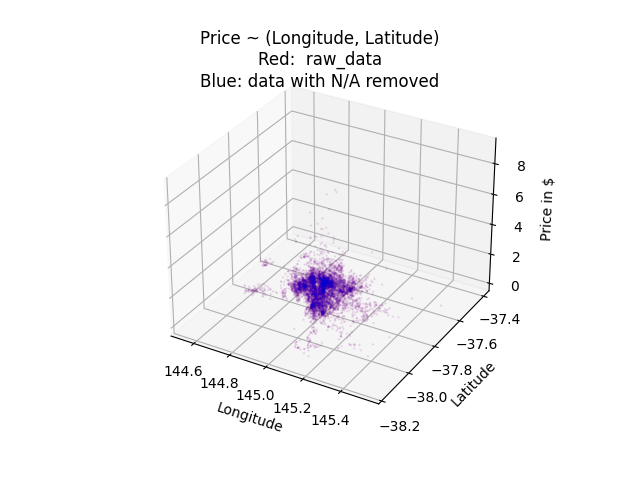

In [17]:
%matplotlib widget
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

fig.suptitle('''
Price ~ (Longitude, Latitude)
Red:  raw_data
Blue: data with N/A removed
''')

ax.set(
    xlabel='Longitude',
    ylabel='Latitude',
    zlabel=f'Price in \\$',
)
ax.scatter(melbourne_outliers_removed_raw.Longitude, melbourne_outliers_removed_raw.Latitude, melbourne_outliers_removed_raw.Price, s=.5, alpha=.05, color='red')
ax.scatter(melbourne_outliers_removed.Longitude, melbourne_outliers_removed.Latitude, melbourne_outliers_removed.Price, s=.5, alpha=.05, color='blue')

plt.show()

In [18]:
melbourne_outliers_removed_raw.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Month
count,6571.000000,6.571000e+03,6571.000000,6571.000000,6571.000000,6571.000000,6544.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000
mean,2.984477,1.090446e+06,10.123832,3105.075635,2.957845,1.596865,1.601925,420.577842,140.771519,1963.690458,-37.810317,144.991334,7055.630041,7.152032
std,0.963916,6.733146e+05,6.041098,92.092191,0.966196,0.709481,0.937772,331.996513,70.486621,36.813563,0.079637,0.106133,3749.367064,2.564751
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1850.000000,-38.164920,144.542370,389.000000,2.000000
25%,2.000000,6.400000e+05,6.100000,3043.000000,2.000000,1.000000,1.000000,163.500000,94.000000,1940.000000,-37.857965,144.923700,4217.000000,5.000000
50%,3.000000,9.020000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,396.000000,126.700000,1970.000000,-37.804680,144.995600,6543.000000,7.000000
75%,4.000000,1.350000e+06,13.000000,3150.000000,4.000000,2.000000,2.000000,632.000000,173.000000,1999.000000,-37.759975,145.057900,9264.000000,9.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,2488.000000,495.000000,2018.000000,-37.408530,145.526350,17496.000000,12.000000


In [19]:
melbourne.raw_df.loc[(melbourne.raw_df.Method == 'SA') | (melbourne.raw_df.Method == 'N/A')]
melbourne.raw_df.Method.unique()

array(['S', 'VB', 'SP', 'PI', 'SA'], dtype=object)